In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

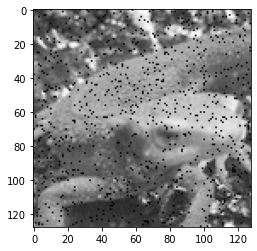

In [2]:
img = cv2.cvtColor(cv2.imread("../imori_noise.jpg"), cv2.COLOR_BGR2GRAY)
H, W = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
K = 5
pad = K // 2
sigma = 3

tmp_img = np.zeros((H+2*pad, W+2*pad), dtype=np.float)
tmp_img[pad:pad+H, pad:pad+W] = img.copy()
output_img = tmp_img.copy()

F = np.zeros((K, K), dtype=np.float)
for x in range(-pad, -pad+K):
    for y in range(-pad, -pad+K):
        e = np.exp(-(x*x + y*y) / (2*sigma*sigma))
        F[x+pad, y+pad] = (x*x + y*y - 2*sigma*sigma) / (2*np.pi*(sigma**6)) * e
F /= np.sum(F)
print(F)

for i in range(H):
    for j in range(W):
        output_img[i+pad, j+pad] = np.sum(F * tmp_img[i:i+K, j:j+K])

output_img = output_img[pad:pad+H, pad:pad+W]
output_img = np.clip(output_img, 0, 255).astype("uint8")

[[0.02219694 0.03408936 0.03880887 0.03408936 0.02219694]
 [0.03408936 0.04956531 0.05567167 0.04956531 0.03408936]
 [0.03880887 0.05567167 0.06231396 0.05567167 0.03880887]
 [0.03408936 0.04956531 0.05567167 0.04956531 0.03408936]
 [0.02219694 0.03408936 0.03880887 0.03408936 0.02219694]]


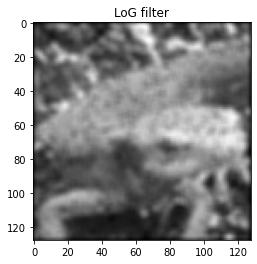

In [4]:
plt.imshow(output_img, cmap="gray")
plt.title("LoG filter")
plt.show()